**GLOBAL C02 EMISSIONS**

---

In the light of global warming it's important to analyse the data we have about the emissions in CO2 of all countries around the globe. In this project I made some visualizations to have a better insight in the emissions of the most important players in the field of CO2 emission.


DATA PREPERATION

---



The dataset I used was the first table of this Wikipedia page on carbon dioxide emissions (https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions). 




The first step is to import the data, to get the raw data.

In [1]:
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions", thousands = ',')
global_co2_emissions = tables[1]
global_co2_emissions 


Country[20]  ...   2018 CO2 emissions[21]
                        Country[20]  ... Total excluding LUCF[23]
0                             World  ...                 35247.21
1    World – International Aviation  ...                      NaN
2    World – International Shipping  ...                      NaN
3                       Afghanistan  ...                     7.44
4                           Albania  ...                     5.56
..                              ...  ...                      ...
207                         Vietnam  ...                   257.86
208                  Western Sahara  ...                      NaN
209                           Yemen  ...                     9.31
210                          Zambia  ...                     7.74
211                        Zimbabwe  ...                    12.27

[212 rows x 10 columns]

Renaming the columns to avoid a multiIndex table.

In [10]:
global_co2_emissions.columns = ['Country', '1990','2005','2017','Perc_world', 'Change_perc_90to17','Per_land_area_17', 'Per_capita_17','Tot_incl_LUCF_18','Tot_excl_LUCF_18']
global_co2_emissions


,Country,1990,2005,2017,Perc_world,Change_perc_90to17,Per_land_area_17,Per_capita_17,Tot_incl_LUCF_18,Tot_excl_LUCF_18
0,World,22674.116,30049.809,37077.404,100.00%,63.5%,73.0,4.9,36431.11,35247.21
1,World – International Aviation,258.941,422.777,543.381,1.47%,109.8%,NaN,NaN,NaN,NaN
2,World – International Shipping,371.804,572.169,677.248,1.83%,82.2%,NaN,NaN,NaN,NaN
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


Filtering out the rows that are not countries to make a clean dataset.

In [12]:
global_emissions = global_co2_emissions.loc[((global_co2_emissions.Country.str.contains('World')==False) & (global_co2_emissions.Country.str.contains('Europe')==False))]
global_emissions


,Country,1990,2005,2017,Perc_world,Change_perc_90to17,Per_land_area_17,Per_capita_17,Tot_incl_LUCF_18,Tot_excl_LUCF_18
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


Importing Numpy en Matplotlib

In [4]:
import matplotlib.pyplot as plt
import numpy as np

ANALYSIS 1: THE FIVE COUNTRIES WITH HIGHEST CO2 EMISSION

---

Sorting the dataframe to list the five countries with the highest CO2 emission first. 

After that selecting the 5 highest emitters. 

In [13]:
sorted_global_emissions = global_emissions.sort_values('2017', ascending=False)
#print(sorted_global_emissions)
biggest_co2_emission = sorted_global_emissions[0:5]
print(biggest_co2_emission)
#biggest_co2_emission.loc[:,'2017']

           Country      1990  ...  Tot_incl_LUCF_18  Tot_excl_LUCF_18
42           China  2397.048  ...           9663.36          10313.46
202  United States  5085.897  ...           4749.57           4981.30
93           India   605.968  ...           2400.25           2434.52
158         Russia  2378.921  ...           1049.05           1607.55
102          Japan  1149.400  ...           1074.08           1106.15

[5 rows x 10 columns]


Making up a dataframe with the necessary columns to make the first graph.

In [14]:
df_plot1 = biggest_co2_emission.loc[:,:'2017']
df_plot1

,Country,1990,2005,2017
42,China,2397.048,6263.064,10877.218
202,United States,5085.897,5971.571,5107.393
93,India,605.968,1210.754,2454.774
158,Russia,2378.921,1733.950,1764.866
102,Japan,1149.400,1276.863,1320.776


Making up graph 1: a multiple line chart.   The x-axis should be the years of 1990, 2005 and 2017.  The y-axis should represent the fossil CO2 emissions in Mt CO2 for the given years.

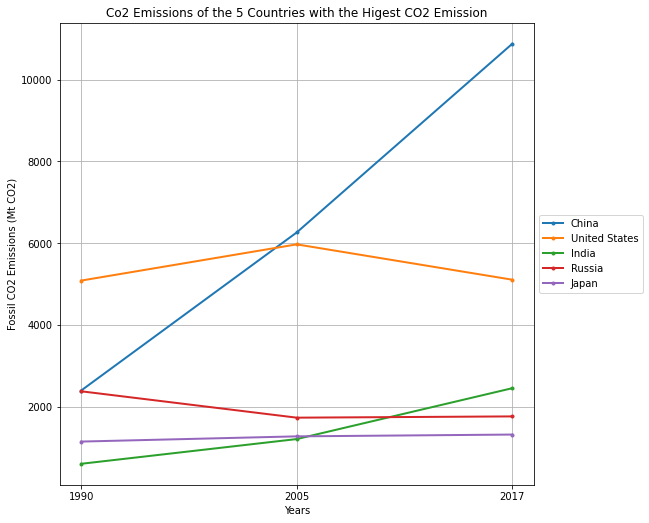

In [15]:
fig, ax = plt.subplots()

years = df_plot1.columns[1:4]

for index, row in df_plot1.iterrows():
 plt.plot(years, row[1:], label=row[0], marker='.', linewidth=2)

plt.title('Co2 Emissions of the 5 Countries with the Higest CO2 Emission')
plt.xlabel('Years')
plt.ylabel('Fossil CO2 Emissions (Mt CO2)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_size_inches(8.5, 8.5)
plt.grid()

plt.show()

ANALYSIS 2: THE THREE WORST AND BEST CHANGERS OVER TIME

---

Because of climate change it's important that we curb our carbon dioxide emissions. So some countries will have lowered their emissions while others may have increased their emissions. Some countries will have better results in doing this than others. If we calculate the relative change and sort by that change we'll get a list with countries that are changing for the better at one end and countries that are changing less well on the other end.


Starting out again with the complete clean dataframe.

In [16]:
global_emissions

,Country,1990,2005,2017,Perc_world,Change_perc_90to17,Per_land_area_17,Per_capita_17,Tot_incl_LUCF_18,Tot_excl_LUCF_18
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


Adding 3 new columns for the relative change from 1990 to 2005 and the change from 2005 to 2017

In [17]:
global_emissions['Change_1990_2005'] = (global_emissions.loc[:,'2005']/global_emissions.loc[:,'1990'])*100    
global_emissions['Change_2005_2017'] = (global_emissions.loc[:,'2017']/global_emissions.loc[:,'2005'])*100
global_emissions['Perc_1990']= 100   
global_emissions['Total_change'] = (global_emissions.loc[:,'2017']/global_emissions.loc[:,'1990'])*100            
global_emissions                                                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Country,1990,2005,2017,Perc_world,Change_perc_90to17,Per_land_area_17,Per_capita_17,Tot_incl_LUCF_18,Tot_excl_LUCF_18,Change_1990_2005,Change_2005_2017,Perc_1990,Total_change
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44,41.751767,1074.506115,100,448.625295
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56,63.739936,119.780744,100,76.348170
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67,149.515051,162.865464,100,243.508382
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34,273.030251,193.276995,100,527.704666
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN,233.333333,200.000000,100,466.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86,491.680706,220.424061,100,1083.782579
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN,157.638889,121.585903,100,191.666667
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31,316.073762,57.437523,100,181.544940
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74,83.147208,202.157102,100,168.087986


Sorting the columns, the countries with the smallest changes, in CO2 emission given the change from 1990 to 2017, listed first. 

After that making up a dataframe with the necessary columns to make up graph 2.

In [39]:
df_plot2_sorted = global_emissions.sort_values(by=['Total_change'])
#df_plot2_sorted
df_plot2_sorted = df_plot2_sorted.loc[:,['Country','Perc_1990','Change_1990_2005','Change_2005_2017']]

df_plot2_sorted

,Country,Perc_1990,Change_1990_2005,Change_2005_2017
10,Armenia,100,21.943089,106.384852
128,Moldova,100,25.468598,101.523529
199,Ukraine,100,45.253380,58.043501
141,North Korea,100,60.570167,47.473859
76,Georgia,100,14.330119,232.134967
...,...,...,...,...
37,Cape Verde,100,463.265306,420.704846
197,Turks and Caicos Islands,100,71.428571,3300.000000
62,Equatorial Guinea,100,3475.257732,73.242361
34,Cambodia,100,659.950860,393.149665


Selecting the three worst and the three best changers. 

In [40]:
df_plot2_sorted_head = df_plot2_sorted.head(3)
df_plot2_sorted_tail = df_plot2_sorted.tail(3)
frames = [df_plot2_sorted_head, df_plot2_sorted_tail]
df_plot2_def = pd.concat(frames) 
df_plot2_def

,Country,Perc_1990,Change_1990_2005,Change_2005_2017
10,Armenia,100,21.943089,106.384852
128,Moldova,100,25.468598,101.523529
199,Ukraine,100,45.253380,58.043501
62,Equatorial Guinea,100,3475.257732,73.242361
34,Cambodia,100,659.950860,393.149665
81,Greenland,100,21033.333333,82.091918


Plotting the results of the three best and worst changers over the years 1990, 2005 and 2017.



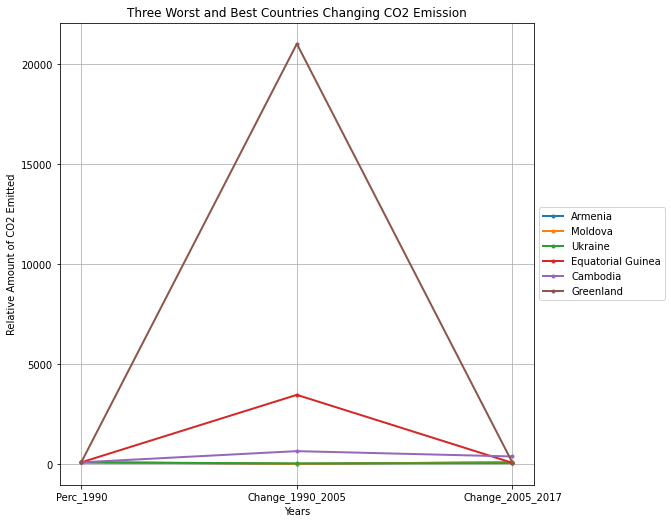

In [41]:
fig, ax = plt.subplots()

years2 = df_plot2_def.columns[1:]

for index, row in df_plot2_def.iterrows():
 plt.plot(years2, row[1:], label=row[0], marker='.', linewidth=2)

plt.title('Three Worst and Best Countries Changing CO2 Emission')
plt.xlabel('Years')
plt.ylabel('Relative Amount of CO2 Emitted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_size_inches(8.5, 8.5)
plt.grid()

plt.show()

ANALYSIS 3: MAKING A BETTER GRAPH BY DELETING SMALL EMITTING COUNTRIES

---


Graph 2 looks distored because of small countries. So filtering out the small countries with mt CO2 < 5 in 1990 will make a better graph.

In [51]:
global_emissions_filt = global_emissions.loc[global_emissions['1990']>5]
global_emissions_filt


,Country,1990,2005,2017,Perc_world,Change_perc_90to17,Per_land_area_17,Per_capita_17,Tot_incl_LUCF_18,Tot_excl_LUCF_18,Change_1990_2005,Change_2005_2017,Perc_1990,Total_change
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56,63.739936,119.780744,100,76.348170
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67,149.515051,162.865464,100,243.508382
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34,273.030251,193.276995,100,527.704666
9,Argentina,112.434,165.429,209.968,0.57%,86.7%,76.0,4.7,207.11,177.41,147.134319,126.923333,100,186.747781
10,Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,5.59,5.55,21.943089,106.384852,100,23.344123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Uzbekistan,123.106,116.386,95.350,0.26%,-22.5%,213.0,3.0,108.72,112.09,94.541290,81.925661,100,77.453577
206,Venezuela,109.268,152.464,145.877,0.39%,33.5%,159.0,4.6,181.29,138.16,139.532159,95.679636,100,133.503862
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86,491.680706,220.424061,100,1083.782579
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31,316.073762,57.437523,100,181.544940


Selecting the needed columns and sorting the values

In [53]:
df_plot3_sorted = global_emissions_filt.sort_values(by=['Total_change'])
#df_plot3_sorted
df_plot3_sorted = df_plot3_sorted.loc[:,['Country','Perc_1990','Change_1990_2005','Change_2005_2017']]

df_plot3_sorted

,Country,Perc_1990,Change_1990_2005,Change_2005_2017
10,Armenia,100,21.943089,106.384852
128,Moldova,100,25.468598,101.523529
199,Ukraine,100,45.253380,58.043501
141,North Korea,100,60.570167,47.473859
76,Georgia,100,14.330119,232.134967
...,...,...,...,...
6,Angola,100,273.030251,193.276995
155,Qatar,100,266.619606,225.134108
17,Bangladesh,100,280.025959,217.711284
144,Oman,100,277.381353,237.898920


Selecting the worst and the best changers


In [57]:
df_plot3_sorted_head = df_plot3_sorted.head(3)
df_plot3_sorted_tail = df_plot3_sorted.tail(3)
frames_2 = [df_plot3_sorted_head, df_plot3_sorted_tail]
df_plot3_def = pd.concat(frames_2) 
df_plot3_def

,Country,Perc_1990,Change_1990_2005,Change_2005_2017
10,Armenia,100,21.943089,106.384852
128,Moldova,100,25.468598,101.523529
199,Ukraine,100,45.253380,58.043501
17,Bangladesh,100,280.025959,217.711284
144,Oman,100,277.381353,237.898920
207,Vietnam,100,491.680706,220.424061


Plotting the results of the three best and worst changers over the years 1990, 2005 and 2017.

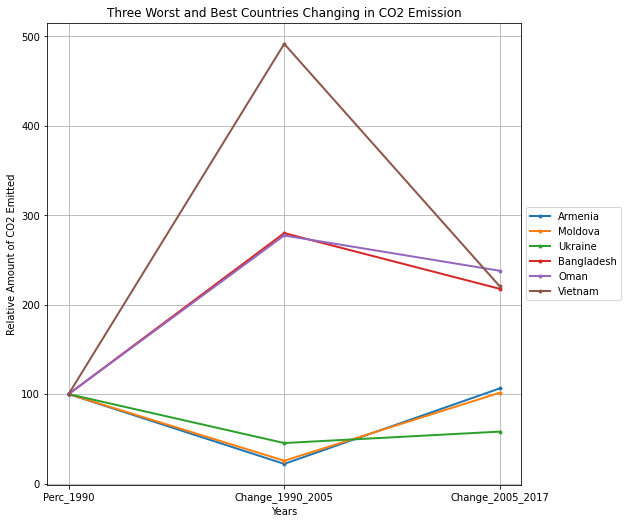

In [59]:
fig, ax = plt.subplots()

years3 = df_plot3_def.columns[1:]

for index, row in df_plot3_def.iterrows():
 plt.plot(years3, row[1:], label=row[0], marker='.', linewidth=2)

plt.title('Three Worst and Best Countries Changing in CO2 Emission')
plt.xlabel('Years')
plt.ylabel('Relative Amount of CO2 Emitted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_size_inches(8.5, 8.5)
plt.grid()

plt.show()